In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matricesAleatorias import matham as mh

Este primer caso es para una unica matriz muy grande

In [2]:
n = 10000
H = mh.MatrizHamiltoniana(n) #Se crea el objeto Hamiltoniana
densidad = mh.DensidadesHam(n,1) #Se crea el objeto de las densidades

In [3]:
HGOE = H.GOE() #Se construye la matriz hamiltoniana GOE de n*n

In [4]:
Evals = np.linalg.eigvalsh(HGOE) #Se calculan los egenvalores ordenados
EvalsNorm = Evals / np.sqrt(n) #Se normalizan los eigenvalores

In [5]:
#Se extrae un porcentaje de los eigenvalores

m = int(n/6)
EvalsLin = Evals[m:-m]
EvalsLinNorm = EvalsNorm[m:-m]

In [6]:
#Construcción de los dominios de los eigenvalores lineales
Dom = np.linspace(m,EvalsLin.size+m,EvalsLin.size)
DomNorm = np.linspace(m,EvalsLinNorm.size+m,EvalsLinNorm.size)

In [7]:
#Se calculan los espaciamientos no normalizados
Espaciamientos = np.diff(EvalsLin)
delta = Espaciamientos.mean()
S = Espaciamientos / delta

In [8]:
#Se calculan los espaciamientos normalizados
EspaciamientosNorm = np.diff(EvalsLinNorm)
deltaNorm = EspaciamientosNorm.mean()
SNorm = EspaciamientosNorm / deltaNorm

In [9]:
r = (Evals[1:-1] - Evals[2:]) / (Evals[:-2] - Evals[1:-1])
rNorm = (EvalsNorm[1:-1] - EvalsNorm[2:]) / (EvalsNorm[:-2] - EvalsNorm[1:-1])

In [10]:
Porcentaje = 100 - 200*m/n
Porcentaje

66.68

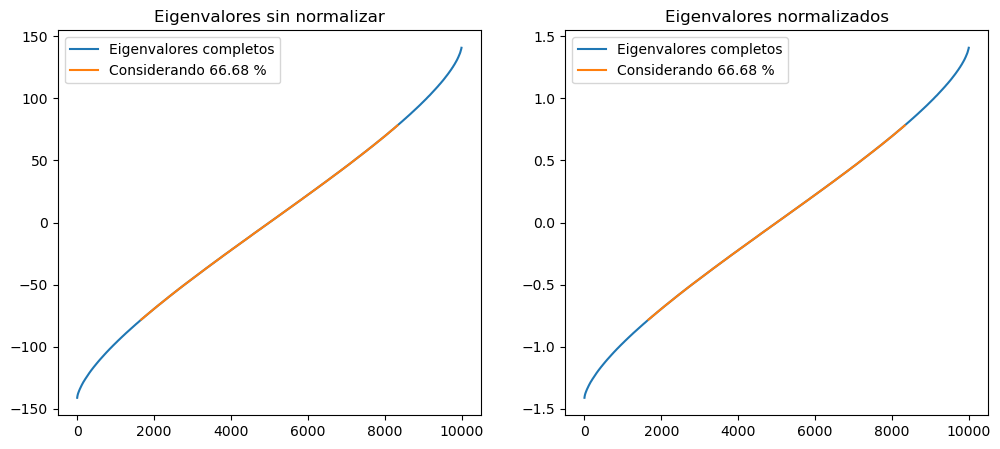

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(Evals,label='Eigenvalores completos')
ax[0].plot(Dom,EvalsLin,label=f'Considerando {Porcentaje} %')
ax[0].set_title('Eigenvalores sin normalizar')
ax[0].legend()

ax[1].plot(EvalsNorm,label='Eigenvalores completos')
ax[1].plot(DomNorm,EvalsLinNorm,label=f'Considerando {Porcentaje} %')
ax[1].set_title('Eigenvalores normalizados')
ax[1].legend()



## Ley del semi-circulo de Wigner

In [12]:
x = np.linspace(Evals.min(),Evals.max(),n)
xnorm = np.linspace(EvalsNorm.min(),EvalsNorm.max(),n)

In [20]:
plam = densidad.Plam(x)
plamNorm = densidad.SemiCicle(xnorm)

In [21]:
histEign,bin = np.histogram(EvalsNorm,bins=30)

In [22]:
histEignNorm = histEign/n

In [23]:
bin_centers = (bin[:-1] + bin[1:]) / 2

" ax[1].bar(bin_centers, histEign, width=bin[1]-bin[0], \n        alpha=0.7, color='blue', edgecolor='white', label='Normalizados')\n "

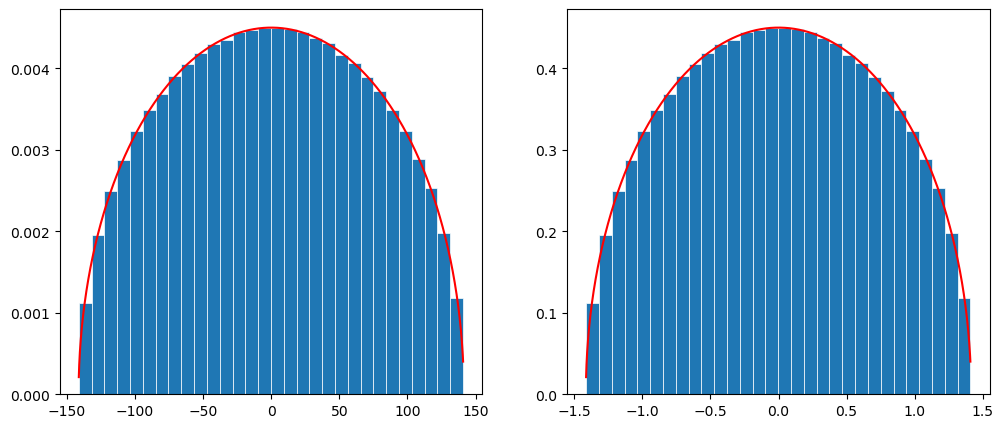

In [25]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(x,plam,c='r')
ax[0].hist(Evals,bins=30,density=True,linewidth=0.5, edgecolor="white")

ax[1].plot(xnorm,plamNorm,c='r')
ax[1].hist(EvalsNorm,bins=30,density=True,linewidth=0.5,edgecolor='white')
""" ax[1].bar(bin_centers, histEign, width=bin[1]-bin[0], 
        alpha=0.7, color='blue', edgecolor='white', label='Normalizados')
 """

## Espaciamientos

In [26]:
x = np.linspace(0,5,100)
ps = densidad.Ps(x)
psNorm = densidad.Ps(x)

Text(0.5, 0, 'S')

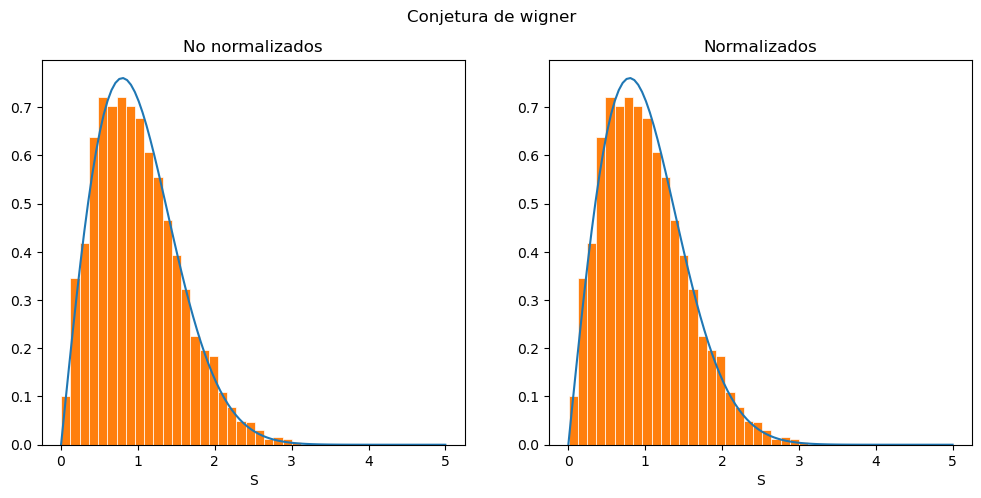

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle('Conjetura de wigner')

ax[0].plot(x,ps)
ax[0].hist(S,bins=30,density=True,linewidth=0.5, edgecolor="white")
ax[0].set_title('No normalizados')
ax[0].set_xlabel('S')

ax[1].plot(x,psNorm)
ax[1].hist(SNorm,bins=30,density=True,linewidth=0.5, edgecolor="white")
ax[1].set_title('Normalizados')
ax[1].set_xlabel('S')

## Distribución de r's

In [28]:
x = np.linspace(0,8,1000)

In [29]:
pr = densidad.Pr(x)

(0.0, 8.0)

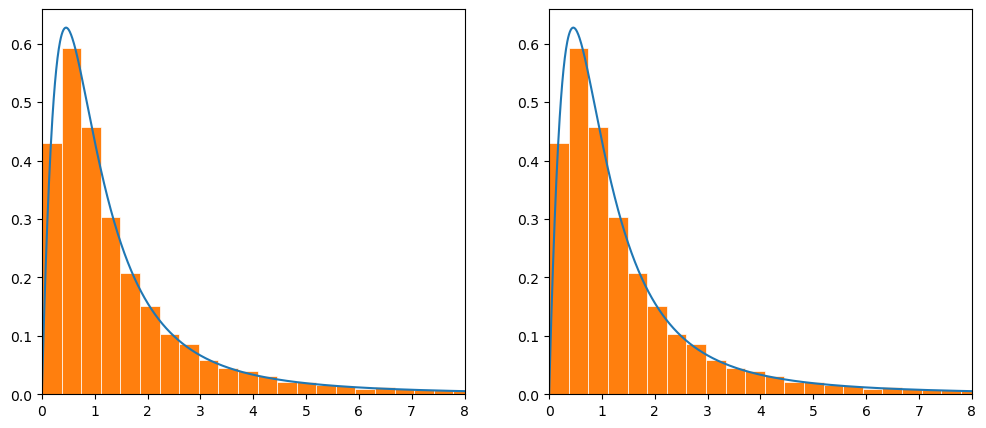

In [30]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(x,pr)
ax[0].hist(r,bins=1000,density=True,linewidth=0.5, edgecolor="white")
ax[0].set_xlim(0,8)

ax[1].plot(x,pr)
ax[1].hist(rNorm,bins=1000,density=True,linewidth=0.5, edgecolor="white")
ax[1].set_xlim(0,8)

# Ensambles

In [31]:
n = 100
nsamp = 100000

In [32]:
H = mh.MatrizHamiltoniana(n)
Eval = []

In [33]:
densidad = mh.DensidadesHam(nsamp,1)

In [34]:
for i in range(nsamp):
    HGOE = H.GOE()
    eval = np.linalg.eigvalsh(HGOE)
    eval = eval / np.sqrt(n)
    Eval.append(eval)

In [35]:
Eval = np.concatenate(Eval)

In [36]:
#np.savetxt('EnsambleGOE.dat',Eval)

In [37]:
Eval.shape

(10000000,)

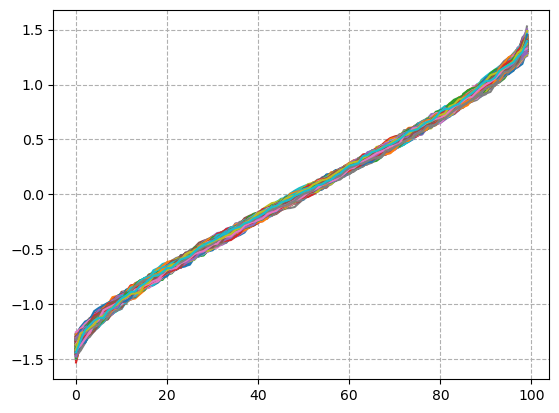

In [38]:
plt.figure()

for i in range(int(nsamp/n)):
    plt.plot(Eval[0+i*100:100 + i*100])

plt.grid(True,linestyle='--')
plt.show()

In [44]:
xlam = np.linspace(-1.5,1.5,1000)
plam = densidad.SemiCicle(xlam)

In [45]:
hisEns, binEns = np.histogram(Eval,bins=30)

In [46]:
hisEnsNorm = hisEns/Eval.size

In [47]:
bin_centers = (binEns[:-1] + binEns[1:]) / 2

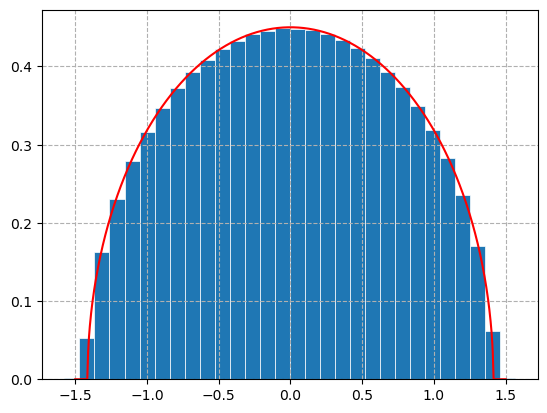

In [50]:
plt.figure()

plt.grid(True,linestyle='--')
plt.hist(Eval,bins=30,density=True,linewidth=0.5, edgecolor="white")
""" plt.bar(bin_centers, hisEns, width=bin[1]-bin[0], 
       alpha=0.7, color='blue', edgecolor='white', label='Normalizados')
 """
plt.plot(xlam,plam,c='r')


plt.show()


### Distribución r's para un ensamble

In [51]:
r = []

In [52]:
for i in range(int(nsamp/n)):
    EvalSamp = Eval[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    r.append(rsamp)

In [53]:
r = np.concatenate(r)

In [54]:
xr = np.linspace(0,10,1000)
pr = densidad.Pr(xr)

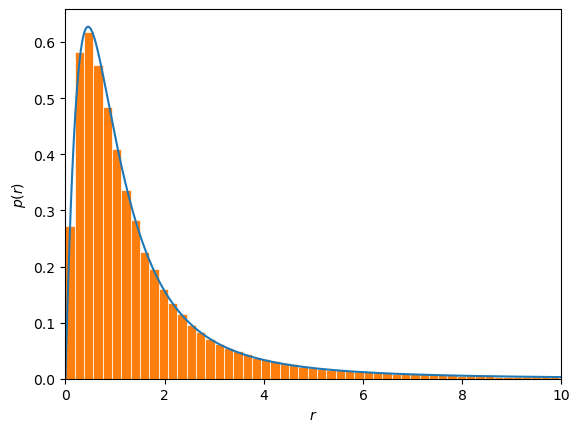

In [62]:
plt.figure()

plt.plot(xr,pr)
plt.hist(r,bins=5000,density=True,linewidth=0.5, edgecolor="white")
plt.xlabel(r'$ r $')
plt.ylabel(r'$ p(r) $')
plt.xlim(0,10)

plt.show()

### $P(s)$

In [56]:
m = int(n/6)
Porcentaje = 100 - 200*m/n
Porcentaje

68.0

In [57]:
S = []

In [58]:
for i in range(int(nsamp/n)):
    EvalSamp = Eval[0+i*100:100 + i*100]
    EvalSampLin = EvalSamp[m:-m]
    EspaSamp = np.diff(EvalSampLin)
    deltaSamp = EspaSamp.mean()
    Ssamp = EspaSamp / deltaSamp
    S.append(Ssamp)

In [59]:
S = np.concatenate(S)

In [60]:
xs = np.linspace(0,5,1000)
ps = densidad.Ps(xs)

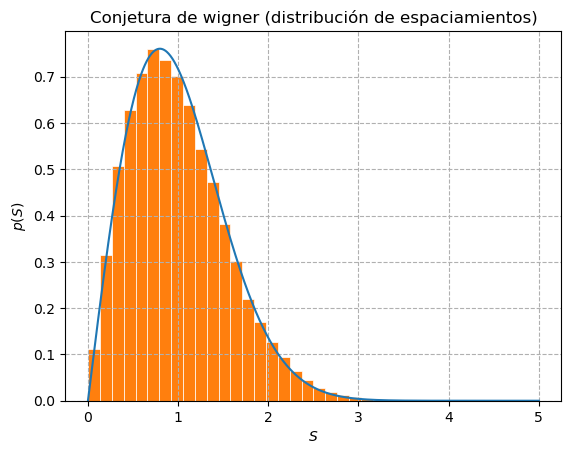

In [61]:
plt.figure()

plt.plot(xs,ps)
plt.hist(S,bins=30,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')
plt.xlabel(r'$ S $')
plt.ylabel(r'$ p(S) $')
plt.title('Conjetura de wigner (distribución de espaciamientos)')

plt.show()